<center>
        
</center>
<h1 align=center><font size = 5>Assignment 3</font>
<h1 align=center><font size = 5>Fahad Iftekhar</font>

This assignment is on Support Vector Machines (SVM) includes the following tasks:

<h3 style="color:blue;">1: Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

<h3 style="color:blue;">2: Load Dataset</h3>

In [2]:
# Load datasets
customers_data = pd.read_csv('customers_data.csv')
customers_data_full = pd.read_csv('customers_data_full.csv')
customers_data_test = pd.read_csv('customers_data_test.csv')

##### Preview data

In [3]:
# Preview data
print(customers_data.head())

   debt_to_income_ratio  credit_score  default
0              0.177052    773.283908        0
1              0.177856    707.287883        0
2              0.184835    745.822031        0
3              0.100024    802.684603        0
4              0.375014    458.766013        1


<h3 style="color:blue;">3: Data Exploration and Transformation</h3>

##### Get the number of objects and attributes

In [4]:
customers_data.shape

(1000, 3)

##### Identify Data Types

In [5]:
print("Data Types in Bank Dataset:\n", customers_data.dtypes)

Data Types in Bank Dataset:
 debt_to_income_ratio    float64
credit_score            float64
default                   int64
dtype: object


##### Check Null values in Dataset

In [6]:
# Checking for missing values
print("Missing values in each column:\n", customers_data.isnull().sum())

Missing values in each column:
 debt_to_income_ratio    0
credit_score            0
default                 0
dtype: int64


##### Describe Dataset

In [7]:
# Describe dataset
print(customers_data.describe())

       debt_to_income_ratio  credit_score     default
count           1000.000000   1000.000000  1000.00000
mean               0.312306    601.300281     0.50000
std                0.115125    155.142040     0.50025
min                0.084150    342.124534     0.00000
25%                0.204797    451.145528     0.00000
50%                0.303628    593.839869     0.50000
75%                0.420508    749.532687     1.00000
max                0.574109    877.724303     1.00000


<h3 style="color:green;">4: Task (a): Generate scatter plot</h3>

<h5 style="color:blue;">(a) Generate a scatter plot of the data in “customers_data.csv”. Color code the data points to
visualize the datapoints belonging to each class.</h5>

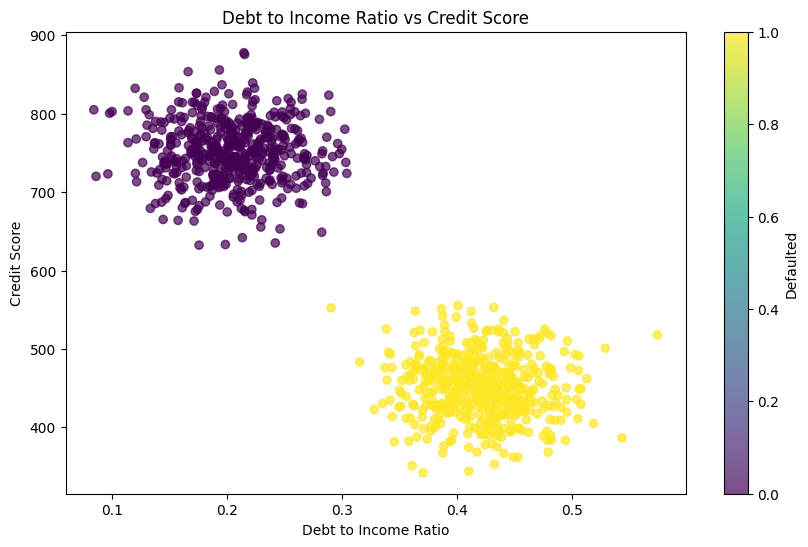

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(customers_data['debt_to_income_ratio'], customers_data['credit_score'], 
            c=customers_data['default'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Defaulted')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Credit Score')
plt.title('Debt to Income Ratio vs Credit Score')
plt.show()

<h3 style="color:blue;">Pre-process the data</h3>

<h3 style="color:green;">5: Task (b): SVM with very large C</h3>

<h5 style="color:blue;">(b) Preprocess the data and build an SVM classifier with very large C value. What type of margin
classifier is this?</h5>

#####  Define features and labels

#####  Standarized data

In [9]:
# Preprocess the data
def preprocess_data(data):
    # Define features and labels
    X = data[['debt_to_income_ratio', 'credit_score']]
    y = data['default']
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler

##### Split Train and Test data

In [10]:
X_train, y_train, scaler = preprocess_data(customers_data)
X_test, y_test, _ = preprocess_data(customers_data_test)
X_train_full, y_train_full, scaler_full = preprocess_data(customers_data_full)

##### SVM with very large C

In [11]:
# Create an instance of the SVM classifier with a large C value for a hard margin

# C value is = 1e10
svm_large_c = SVC(C=1e10, kernel='linear')
svm_large_c.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


##### Get the coefficients of the SVM model.

In [12]:
# Get the coefficients and intercept of the SVM model
svm_coefficients = svm_large_c.coef_
svm_intercept = svm_large_c.intercept_

print("SVM Coefficients:", svm_coefficients)
print("SVM Intercept:", svm_intercept)

SVM Coefficients: [[ 0.78813419 -3.1283347 ]]
SVM Intercept: [0.16409321]


<h3 style="color:blue;">Task (b) Explanation : What type of margin classifier is used with a very large C value?</h3>

<h5 style="color:green;">A large C value forces the SVM to minimize classification errors by assigning a very high penalty for misclassification. This results in a hard margin classifier, which tries to separate the data with the maximum possible margin but without any tolerance for misclassification.</h5>



<h3 style="color:green;">6: Task (c): Plot decision boundary</h3>

<h5 style="color:blue;">(c) Plot the decision boundary of the resulting SVM model and show the margins and the
resulting support vectors. How many support vectors are there?</h5>

##### Construct the decision boundary for SVM.

In [13]:
# Create x_values using np.linspace for constructing the decision boundary
x_values = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)

In [14]:
# Calculate y values for the SVM decision boundary using the coefficients and intercept
# Decision boundary formula: y = -(coef[0]/coef[1]) * x_values - intercept/coef[1]
svm_slope = -svm_coefficients[0, 0] / svm_coefficients[0, 1]
svm_intercept_line = -svm_intercept[0] / svm_coefficients[0, 1]
decision_boundary_svm = svm_slope * x_values + svm_intercept_line

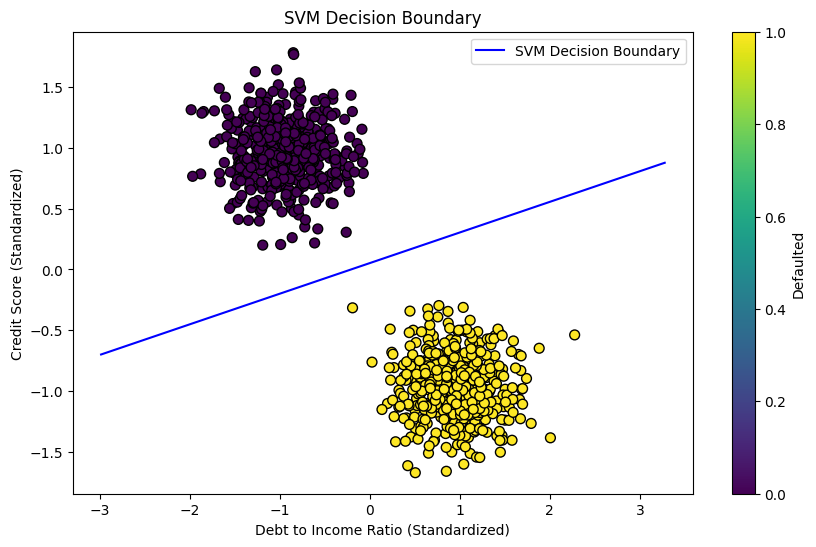

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='viridis', s=50)
plt.plot(x_values, decision_boundary_svm, color='blue', label='SVM Decision Boundary')
plt.xlabel('Debt to Income Ratio (Standardized)')
plt.ylabel('Credit Score (Standardized)')
plt.title('SVM Decision Boundary')
plt.colorbar(label='Defaulted')
plt.legend()
plt.show()


<h3 style="color:blue;">No. of Support vectors</h3>

In [16]:
# Support vectors
print(f'Number of support vectors: {len(svm_large_c.support_)}')

Number of support vectors: 3


<h3 style="color:green;">7: Task (d): Evaluate on test data</h3>

<h5 style="color:blue;">(d) Evaluate the classifier on the “customers_data_test.csv”. Report the value(s) of the
appropriate evaluation metric(s).</h5>

In [17]:
# Task (d): Evaluate on test data
y_pred_test = svm_large_c.predict(X_test)
print('Classification Report on Test Data:')
print(classification_report(y_test, y_pred_test))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



<h3 style="color:green;">8: Task (e): Build SVM on full dataset with large C and handle issues</h3>

<h5 style="color:blue;">(e) Use the “customers_data_full.csv” dataset to build an SVM classifier Set the value of C to be
a very large value.</h5>

##### Build SVM on full dataset with large C and handle issues

In [18]:
# Task (e): Build SVM on full dataset with large C and handle issues

# C value is = 1e10
svm_large_c_full = SVC(C=1e10, kernel='linear')
svm_large_c_full.fit(X_train_full, y_train_full)

print("SVM Full dataset model trained successfully.")

SVM Full dataset model trained successfully.


##### Get the coefficients of the SVM full dataset model.

In [19]:
# Get the coefficients and intercept of the SVM model
svm_coefficients_full = svm_large_c_full.coef_
svm_intercept_full = svm_large_c_full.intercept_

print("SVM Full Coefficients:", svm_coefficients_full)
print("SVM Full Intercept:", svm_intercept_full)

SVM Full Coefficients: [[ 1275.50886106 -1409.503546  ]]
SVM Full Intercept: [-95.97435735]


##### Construct the decision boundary for SVM with full dataset

In [20]:
# Create x_values using np.linspace for constructing the decision boundary
x_values_full = np.linspace(X_train_full[:, 0].min() - 1, X_train_full[:, 0].max() + 1, 100)

In [24]:
# Calculate y values for the SVM decision boundary using the coefficients and intercept
# Decision boundary formula: y = -(coef[0]/coef[1]) * x_values - intercept/coef[1]
svm_slope_full = -svm_coefficients_full[0, 0] / svm_coefficients_full[0, 1]
svm_intercept_line_full = -svm_intercept_full[0] / svm_coefficients_full[0, 1]
decision_boundary_svm_full = svm_slope_full * x_values_full + svm_intercept_line_full


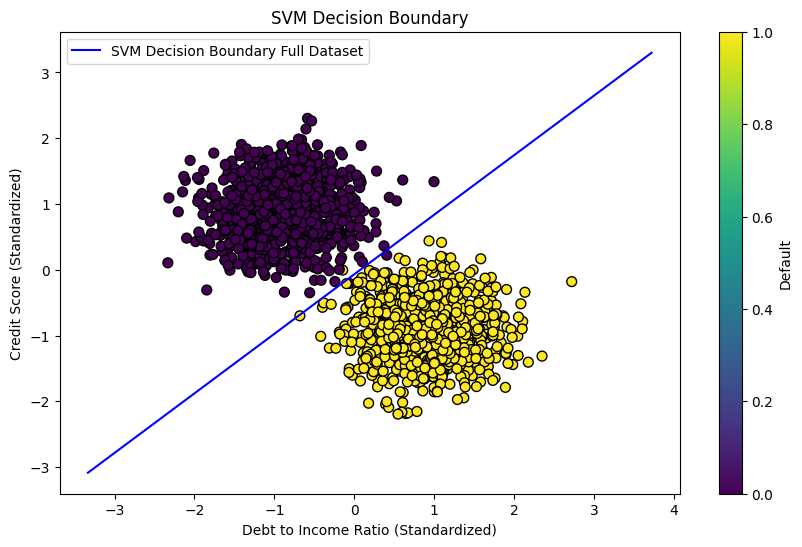

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train_full[:, 0], X_train_full[:, 1], c=y_train_full, edgecolor='k', cmap='viridis', s=50)
plt.plot(x_values_full, decision_boundary_svm_full, color='blue', label='SVM Decision Boundary Full Dataset')
plt.xlabel('Debt to Income Ratio (Standardized)')
plt.ylabel('Credit Score (Standardized)')
plt.title('SVM Decision Boundary')
plt.colorbar(label='Default')
plt.legend()
plt.show()

##### Support vectors

In [26]:
# Support vectors
print(f'Number of support vectors: {len(svm_large_c_full.support_)}')

Number of support vectors: 8


##### Evaluate on test data

In [27]:
# Evaluate on test data
y_pred_full_test = svm_large_c_full.predict(X_test)
print('Classification Report on Test Data (Full Dataset Model):')
print(classification_report(y_test, y_pred_full_test))

Classification Report on Test Data (Full Dataset Model):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



##### Check for overfitting

In [28]:
# Check for overfitting
train_accuracy_full = svm_large_c_full.score(X_train_full, y_train_full)
test_accuracy_full = svm_large_c_full.score(X_test, y_test)

print(f'Train Accuracy (Full Dataset): {train_accuracy_full:.2f}')
print(f'Test Accuracy (Full Dataset): {test_accuracy_full:.2f}')

Train Accuracy (Full Dataset): 1.00
Test Accuracy (Full Dataset): 0.98


##### Handle potential overfitting issues by reducing C

In [29]:
# Handle potential overfitting issues by reducing C
if train_accuracy_full > test_accuracy_full + 0.05:
    print("Model might be overfitting. Reducing C to handle overfitting.")
    svm_reduced_c_full = SVC(C=1.0, kernel='linear')  # Reduced C
    svm_reduced_c_full.fit(X_full, y_full)

    # Evaluate the new model
    y_pred_reduced_test = svm_reduced_c_full.predict(X_test)
    print('Classification Report with Reduced C:')
    print(classification_report(y_test, y_pred_reduced_test))

    # Check the new model's accuracies
    train_accuracy_reduced = svm_reduced_c_full.score(X_train_full, y_train_full)
    test_accuracy_reduced = svm_reduced_c_full.score(X_test, y_test)

    print(f'Train Accuracy (Reduced C): {train_accuracy_reduced:.2f}')
    print(f'Test Accuracy (Reduced C): {test_accuracy_reduced:.2f}')

<h3 style="color:green;">9: Task (f): Issues upon building an SVM classifier using “customers_data_full.csv” </h3>

<h5 style="color:blue;">(f) Discuss any issues you run into when building an SVM classifier using “customers_data_full.csv” and a large value for C. Explain what could be causing those issues.</h5>


<h5 style="color:green;">* Noisy Data: Hard margin classifiers are sensitive to noise. Outliers can drastically affect the decision boundary.</h5>

<h5 style="color:green;">* Overfitting: With a very large C, the model might overfit, capturing noise or irregularities in the data.</h5>

<h5 style="color:green;">* Imbalanced Data: If customers_data_full.csv is imbalanced, SVM decision boundary may be skewed.</h5>

<h5 style="color:green;">* Computational Complexity: A large C increases the computational cost due to stricter optimization constraints.</h5>

<h3 style="color:green;">9: Task (g): SVM with suitable margin classifier</h3>


<h5 style="color:blue;">(g) Build an SVM classifier that is suitable for the data in “customers_data_full.csv”. What type of margin classifier is this?</h5>

##### Calculate the norm of the coefficients for margin calculation

In [30]:
# Calculate the norm of the coefficients for margin calculation
coef_norm = np.linalg.norm(svm_coefficients_full)
margin_width = 2 / coef_norm

##### Calculate the upper and lower margin lines

In [31]:
# Calculate the upper and lower margin lines
upper_margin = decision_boundary_svm_full + margin_width / 2
lower_margin = decision_boundary_svm_full - margin_width / 2

##### Plotting

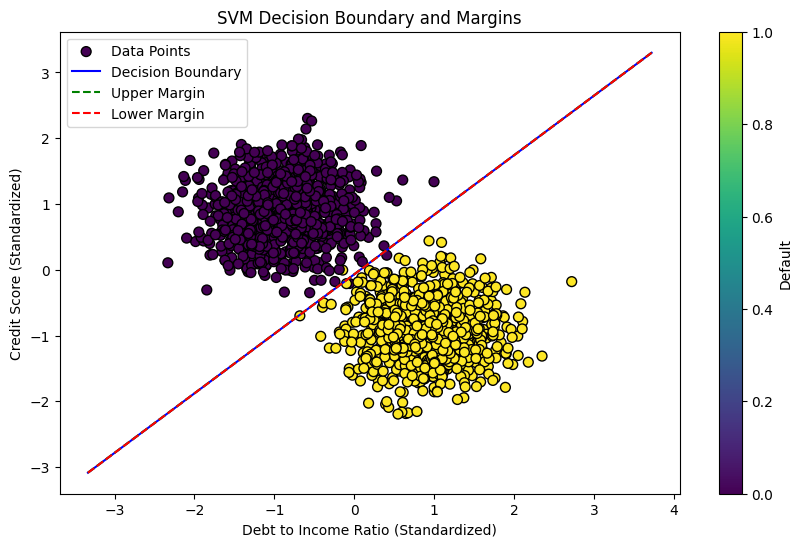

Margin Width: 0.0011


In [34]:
# Plotting the decision boundary and margins
plt.figure(figsize=(10, 6))
plt.scatter(X_train_full[:, 0], X_train_full[:, 1], c=y_train_full, edgecolor='k', cmap='viridis', s=50, label='Data Points')
plt.plot(x_values_full, decision_boundary_svm_full, color='blue', label='Decision Boundary')
plt.plot(x_values_full, upper_margin, linestyle='--', color='green', label='Upper Margin')
plt.plot(x_values_full, lower_margin, linestyle='--', color='red', label='Lower Margin')
plt.xlabel('Debt to Income Ratio (Standardized)')
plt.ylabel('Credit Score (Standardized)')
plt.title('SVM Decision Boundary and Margins')
plt.colorbar(label='Default')
plt.legend()
plt.show()

# Print margin width
print(f'Margin Width: {margin_width:.4f}')

<h3 style="color:blue;">Task (g) Explanation : Build a suitable SVM classifier for customers_data_full.csv and classify its margin type.</h3>

<h5 style="color:green;">* Soft margin: By lowering C, the model allows some misclassifications to better generalize.</h5>

<h3 style="color:green;">10: Task (h): Finding best C</h3>

<h5 style="color:blue;">(h) Choose the value of C that results in the best performance.</h5>

In [36]:
# Task (h): Finding best C
from sklearn.model_selection import GridSearchCV

# Define parameter grid for C values
param_grid = {'C': [0.1, 1, 10, 100, 1000, 1e4, 1e5]}

# Create SVM model with linear kernel
svm_model = SVC(kernel='linear')

# Grid search for the best C value
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_full, y_train_full)

# Best C value and corresponding score
best_c = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C: {best_c}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Best C: 10
Best Cross-Validation Score: 0.9980


<h3 style="color:green;">11: Task (i): Plot decision boundary of optimized model</h3>

<h5 style="color:blue;">(i) Plot the decision boundary of the resulting SVM model and show the margins and the
resulting support vectors. How many support vectors are there?</h5>

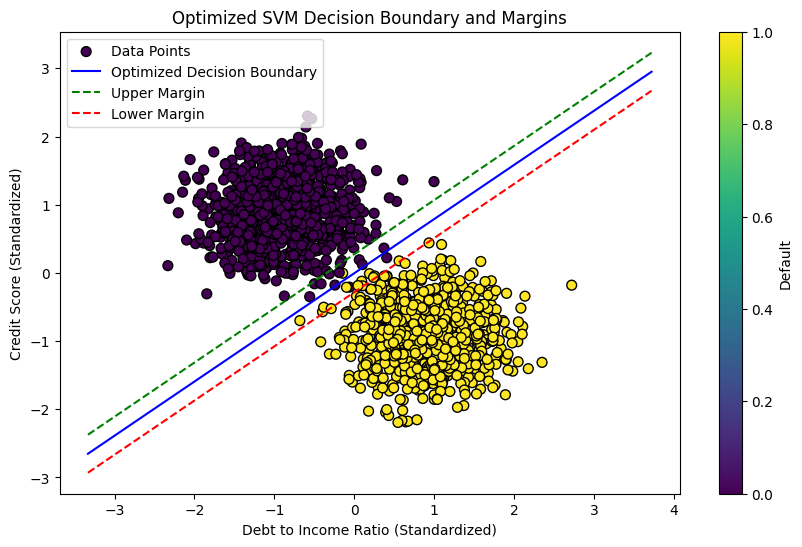

Optimized Margin Width: 0.5574


In [38]:
# Train optimized SVM model
optimized_svm = SVC(C=best_c, kernel='linear')
optimized_svm.fit(X_train_full, y_train_full)

# Extract coefficients and intercept for decision boundary
opt_coefficients = optimized_svm.coef_
opt_intercept = optimized_svm.intercept_

# Calculate decision boundary
opt_slope = -opt_coefficients[0, 0] / opt_coefficients[0, 1]
opt_intercept_line = -opt_intercept[0] / opt_coefficients[0, 1]
decision_boundary_optimized = opt_slope * x_values_full + opt_intercept_line

# Calculate margin width
opt_margin_width = 2 / np.linalg.norm(opt_coefficients)

# Upper and lower margin
upper_margin_optimized = decision_boundary_optimized + opt_margin_width / 2
lower_margin_optimized = decision_boundary_optimized - opt_margin_width / 2

# Plot decision boundary and margins
plt.figure(figsize=(10, 6))
plt.scatter(X_train_full[:, 0], X_train_full[:, 1], c=y_train_full, edgecolor='k', cmap='viridis', s=50, label='Data Points')
plt.plot(x_values_full, decision_boundary_optimized, color='blue', label='Optimized Decision Boundary')
plt.plot(x_values_full, upper_margin_optimized, linestyle='--', color='green', label='Upper Margin')
plt.plot(x_values_full, lower_margin_optimized, linestyle='--', color='red', label='Lower Margin')
plt.xlabel('Debt to Income Ratio (Standardized)')
plt.ylabel('Credit Score (Standardized)')
plt.title('Optimized SVM Decision Boundary and Margins')
plt.colorbar(label='Default')
plt.legend()
plt.show()

# Print optimized margin width
print(f"Optimized Margin Width: {opt_margin_width:.4f}")
